# 1. Qué es la Regresion Lineal?



### Definición

- En Inteligencia Artificial, la regresión lineal es una técnica de modelado predictivo que se utiliza para comprender la relación entre una variable dependiente (también conocida como variable objetivo) y una o más variables independientes (también conocidas como variables predictoras o características). Permite resolver problemas de **regresión**, no de clasificación.

- Los problemas de regresión se enfocan en predecir un valor continuo. Ejemplos: Predecir el precio de una casa, la temperatura, los ingresos anuales, etc. La salida del modelo es un número real.

- El objetivo es ajustar una línea recta (o hiperplano en el caso de múltiples variables).

- La ecuación de una **regresión lineal simple** (línea recta) es:

<img src="img6.png">

donde:

- y es la variable dependiente (lo que queremos predecir).
- x es la variable independiente (la característica o predictor).
- β0​ es el intercepto o término constante de la regresión (representa el valor de y cuando x es igual a 0)
- β1​ es el coeficiente de regresión que mide la pendiente de la línea.
- ϵ es el término de error, que representa la variabilidad en y que no puede ser explicada por la relación lineal con x.


Si β1​ es positivo, y aumenta a medida que x aumenta.

Si β1 es negativo, y disminuye a medida que x aumenta.

- ecuación de un **regresión lineal multiple** (hiperplano) es:

<img src="img7.png">

### Ejemplo Numérico para Regresión Lineal Múltiple

Supongamos que estamos prediciendo el precio de una casa (y) basado en su tamaño en metros cuadrados (x1) y el número de habitaciones (x2). La ecuación ajustada podría ser:

y = 50000 + 200x1 + 15000x2​

    β0​=50000: El intercepto indica que el precio base de una casa, sin considerar tamaño ni número de habitaciones, es 50000.
    β1=200: Cada metro cuadrado adicional agrega 200 al precio de la casa.
    β2=15000: Cada habitación adicional agrega 15000 al precio de la casa.

### Ejemplos de Aplicaciones:

- Economía: Predecir el PIB de un país basado en variables como la inversión, el consumo y las exportaciones.

- Inmobiliaria: Estimar el precio de una vivienda en función de características como el tamaño, el número de habitaciones y la ubicación.

- Salud: Predecir la presión arterial de un paciente en función de su edad, peso y nivel de actividad física.

- Marketing: Estimar las ventas de un producto basado en el gasto en publicidad y otras variables de marketing.

- Educación: Predecir el rendimiento académico de los estudiantes en función de horas de estudio, asistencia a clases y participación en actividades extracurriculares.

# 2. ¿Cómo se evalúa un modelo de Regresión Lineal? 

Las métricas más comunes para evaluar un modelo de regresión lineal incluyen el **Error Cuadrático Medio (MSE)**, el **Error Absoluto Medio (MAE)**, el **Error Cuadrático Medio de la Raíz (RMSE)** y el **Coeficiente de Determinación (R²)**. 

<img src="img8.png">

<img src="img9.png">

<img src="img10.png">

<img src="img11.png">

Un MSE, MAE y RMSE más bajo indica un modelo más preciso.

Un R² más cercano a 1 indica un modelo que explica bien la variabilidad de los datos.

### Pautas Generales:

- R²:
  
        R2 > 0.8: Excelente ajuste (dependiendo del dominio).
  
        0.5 < R2 <= 0.8: Buen ajuste.
  
        0.2 < R2 <= 0.5: Ajuste moderado.
  
        R2 <= 0.2: Pobre ajuste.

- MAE, MSE y RMSE:

        Se consideran buenos si son significativamente menores que la desviación estándar de la variable dependiente.

# 3. Implementación en Python

MSE: 0.6536995137170021
MAE: 0.5913425779189777
RMSE: 0.8085168605026132
R²: 0.8072059636181392
Desviación estándar de y_test: 1.8413751715706361


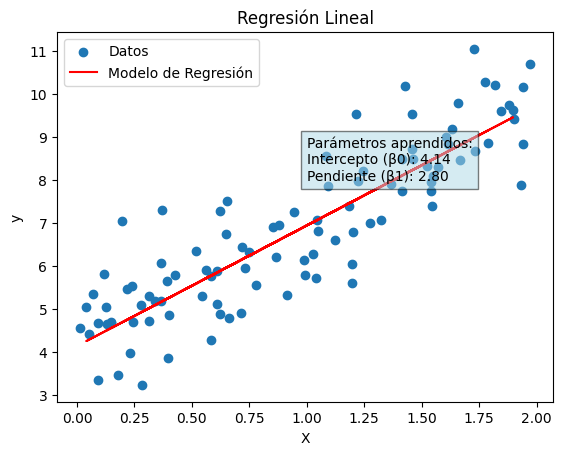

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generamos datos sintéticos
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Hacemos predicciones
y_pred = lin_reg.predict(X_test)

# Calculamos las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Comparar con la desviación estándar de y_test
std_y_test = np.std(y_test)
print(f"Desviación estándar de y_test: {std_y_test}")

# Visualizamos los datos y la línea de regresión
plt.scatter(X, y, label="Datos")
plt.plot(X_test, y_pred, color="red", label="Modelo de Regresión")
plt.title("Regresión Lineal")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Mostrar los parámetros aprendidos
plt.text(1, 8, f'Parámetros aprendidos:\nIntercepto (β0): {lin_reg.intercept_[0]:.2f}\nPendiente (β1): {lin_reg.coef_[0][0]:.2f}', bbox=dict(facecolor='lightblue', alpha=0.5))

plt.show()


# 4. ¿Cómo se aprenden los parametros del modelo de regresión lineal?

- **OLS** significa "Ordinary Least Squares" en inglés. En español se traduce como "Mínimos Cuadrados Ordinarios". Es un método utilizado en estadística para estimar los parámetros en un modelo de regresión lineal.


- El método **OLS** es un método de optimización que busca minimizar los errores observados entre los valores predichos por el modelo y un conjunto de datos de entrenamiento.

# 5. Ilustración con datos reales

California housing dataset: https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el conjunto de datos de viviendas de California
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.DataFrame(california_housing.target, columns=['MedHouseVal'])


In [6]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


Intercepto (β0): [-37.02327771]
Coeficientes (β1, β2, ..., βn): [[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
  -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]]
Error Cuadrático Medio (MSE): 0.5558915986952444
Coeficiente de Determinación (R²): 0.5757877060324508


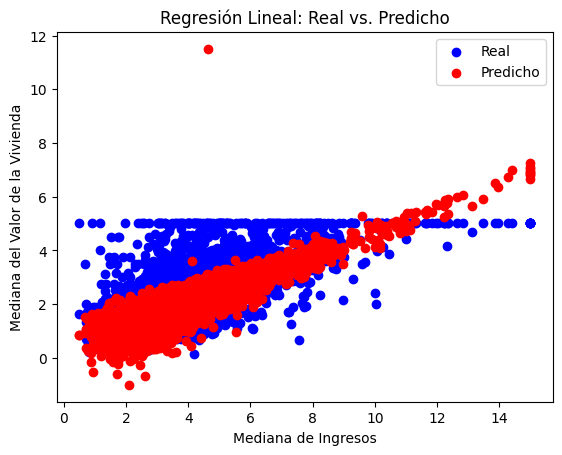

In [8]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Parámetros aprendidos
print("Intercepto (β0):", lin_reg.intercept_)
print("Coeficientes (β1, β2, ..., βn):", lin_reg.coef_)

# Hacer predicciones en el conjunto de prueba
y_pred = lin_reg.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)

# Visualizar la relación entre la variable objetivo y una de las características
plt.scatter(X_test['MedInc'], y_test, color='blue', label='Real')
plt.scatter(X_test['MedInc'], y_pred, color='red', label='Predicho')
plt.xlabel('Mediana de Ingresos')
plt.ylabel('Mediana del Valor de la Vivienda')
plt.title('Regresión Lineal: Real vs. Predicho')
plt.legend()
plt.show()
